# The Percentage Price Oscillator (PPO)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.momentum import PercentagePriceOscillator

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [22]:
df = pd.read_csv("../data/BTCUSDT-minute-target-ui.csv") #indicator tests

## Variations and default correlations¶

In [28]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "ppo_"
    for s in windows:
        f = s*2
        sl = f*2
        i = PercentagePriceOscillator(df.close, sl, f, s)
        sma_name = name + str(s)
        df[sma_name] = i.ppo()
        df[sma_name + "_hist"] = i.ppo_hist()
        df[sma_name + "_signal"] = i.ppo_signal()
        df[name + "rate_" + str(s)] = uf.get_rate(uf.get_moving_average(df[sma_name], s))
        df[name + "hist_rate_" + str(s)] = uf.get_rate(uf.get_moving_average(df[sma_name + "_hist"], s))
        df[name + "sig_rate_" + str(s)] = uf.get_rate(uf.get_moving_average(df[sma_name + "_signal"], s))


#         df[sma_name + "_log"] = list(map(lambda x: uf.log_abs(x*1000), i.ppo_hist()))


In [29]:
variations([2, 20, 200])

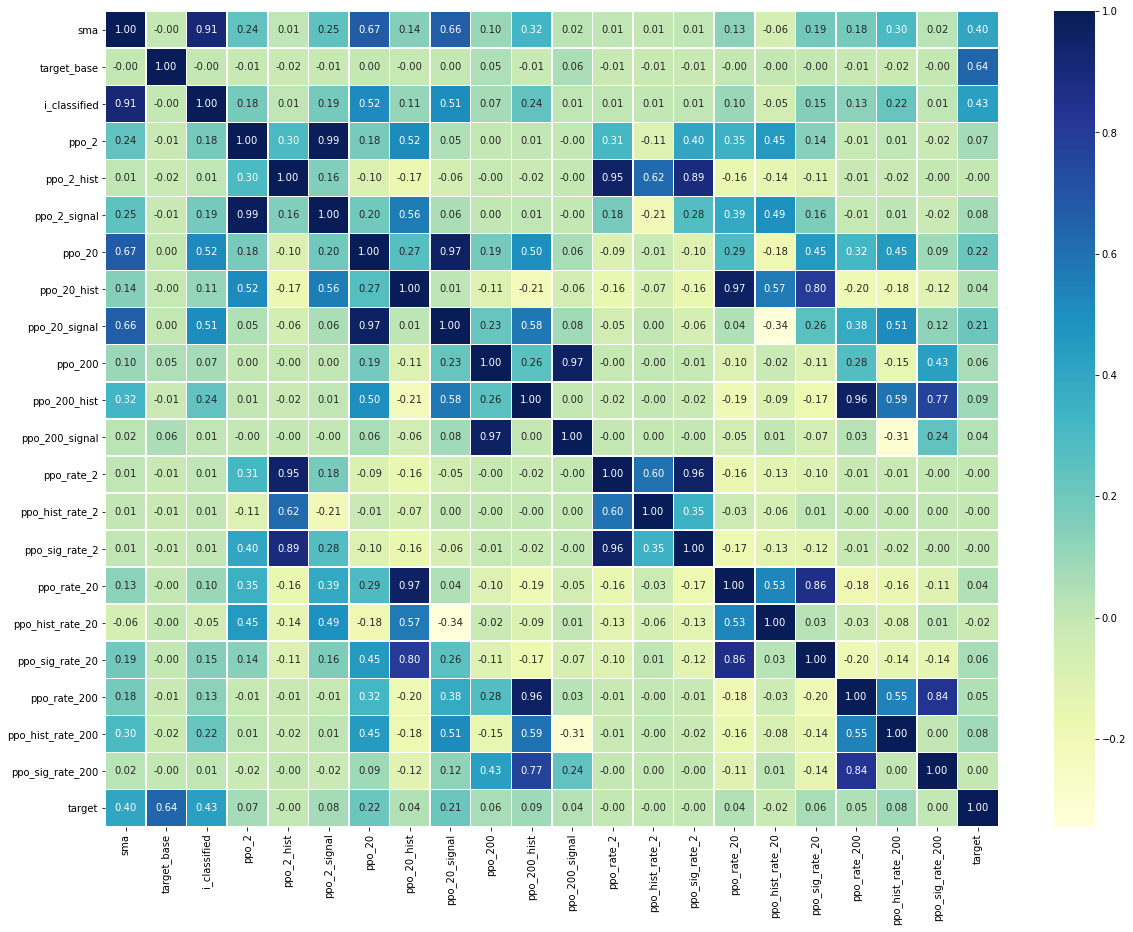

In [30]:
indicators = list(df.columns)[14:]
indicators.append("target")
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [17]:
d = df[1900000:]

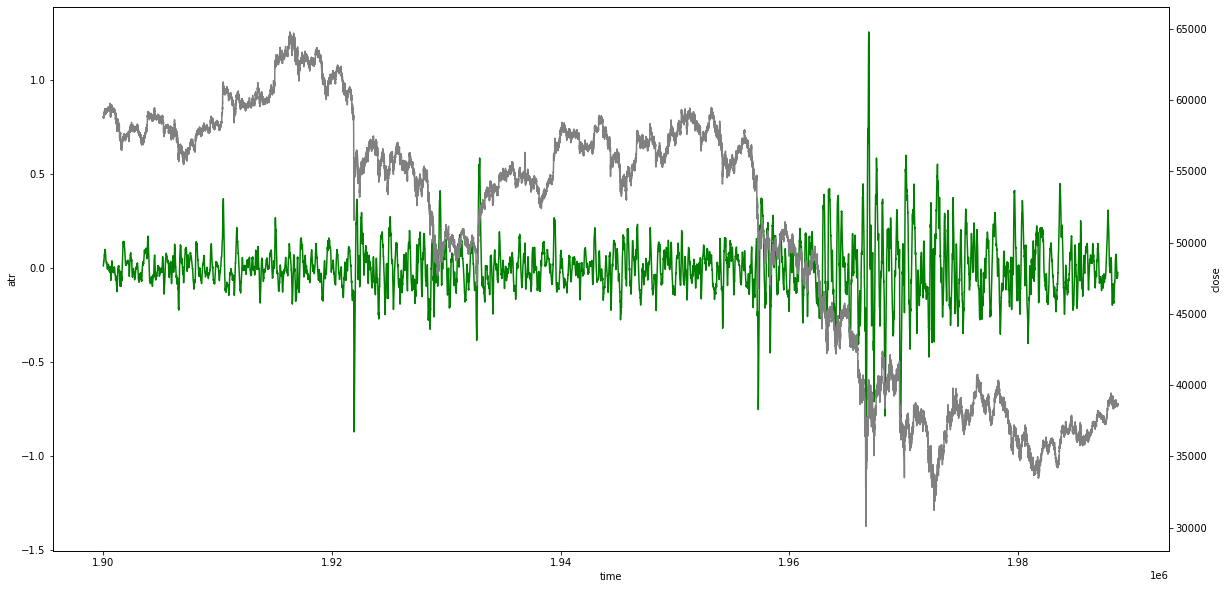

In [18]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.ppo_100_hist,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

# CHOOSE

- ppo_10_signal_log
- ppo_30_hist
- ppo_10 REJECT because too high correlation with kama_10_signal